<h1 align="center">Dynamic Connectivity</h1>

## The UNION FIND Problem

In this problem there is a set of $N$ objects and connections between objects. We postulate that there is an `union` command that connects two objects. Thus, given two objects, it provides a connection between them as:

```python
union(1, 3)
> {1,3}
```
Another command is the `connected` query, which verifies if there is a path connecting the two objects, as:


```python
connected(1, 3)
> True
```

For example, in the image below, we have a set of ten objects:

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/dynamic_connectivity.svg" width="50%"/>

These objects were connected using the following sequence of commands:

```python
union(4, 3)
union(3, 8)
union(6, 5)
union(9, 4)
union(2, 1)
union(5, 0)
union(7, 2)
union(6, 1)
union(1, 0)
```

Thus, we can ask for connection between two objects as:

```python
connected(1, 8)
> False

connected(8, 9)
> True

connected(0, 7)
> True
```

When we ask for the connection between eight and nine, the system answer `True` since there is a path from eight to three to four to nine (8 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 9). Understood this, we need a few abstract properties that these connections have to satisfy. We assume that *is connected to* is an equivalence relation, *i.e.*, every object is connected to itself. It is *symmetric* if $P$ is connected to $Q$, then $Q$ is connected to $P$. It is transitive if $P$ is connected to $Q$, and $Q$ is connected to $R$, then $P$ is connected to $R$. Thus, a connected component is a maximal set of objects that is mutually connected. 


For example, in this small example below we have three connected components. One consisting of just object zero, second one with objects one, four and five; and the third one with the other four objects. 


<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/small_connection.svg" width="40%"/>

$$
\{\ \ 0\ \ \}\ \ \{\ \ 1\ \ 4\ \ 5\ \ \}\ \ \{\ \ 2\ \ 3\ \ 6\ \ 7\ \ \}
$$

## Implementing the Operations

In order to implement the operations, we have to find query and the union command.

- **Find query**: Check if two objects are in the same component.
- **Union command**: Replace components containing two objects with their union.

Example:  

$\{\ \ 0\ \ \}\ \ \{\ \ 1\ \ 4\ \ 5\ \ \}\ \ \{\ \ 2\ \ 3\ \ 6\ \ 7\ \ \}$

```python
union(2,5)
```
$\{\ \ 0\ \ \}\ \ \{\ \ 1\ \ 2\ \ 3\ \ 4\ \ 5\ \ 6\ \ 7\ \ \}$

### Union-find data type

Goal: Design efficient data structure for union-find.
- Number of objects $N$ can be huge.
- Number of operations $M$ can be huge.
- Find queries and union commands may be intermixed.

In [ ]:
class UF(object):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        
    def union(self, p, q):
        # add connection between p and q
        
    def connected(self, p, q):
        # are p and q in the same component?
        # return True or False
        
    def find(self, p):
        # component identifier for p (0 to N-1)

    def count(self):
        # number of components
        return n

### Dynamic-connectivity client

Check our API design before getting too far into dealing with the problem by building a client that is going to use the data type that we develop. So, for this example, we have a client that reads information from standard input. First, an integer which is the number of objects that are going to be processed. Then, a series of pairs of object names. What the client does first is to read the integer from standard input, and create a UF object. Then, as long as standard input is not empty, it is going to read two integers from the input. If they are not connected, then it connects them and print them out. If they are connected it ignores. That's our test client and that's a fine test client to make sure that any implementation does what we expect that it will. 

Read in number of objects $N$ from standard input and repeat the following steps:
- read in pair of integers from standard input
- if they are not yet connected, connect them and print out pair

In order to make it easier, we can create a file called `tinyUF.txt` with the following content:

```
10
4 3
3 8
6 5
9 4
2 1
8 9
5 0
7 2
6 1
1 0
6 7
```

Where the first number is the number of pairs and the following pairs of numbers are the connections for our algorithm.

## Naive Trial

In [23]:
class UF(object):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        self.data = []
        
    def union(self, p, q):
        # add connection between p and q
        i = self.find(p)
        j = self.find(q)
        if i == -1:
            if j == -1:
                self.data.append([p])
                id = self.find(p)
                self.data[id].append(q)
            else:
                self.data[j].append(p)
        else:
            if j == -1:
                self.data[i].append(q)
            elif i != j:
                self.data[i].extend(self.data[j])
                del self.data[j]
        
    def connected(self, p, q):
        # are p and q in the same component?
        # return True or False
        for s in self.data:
            if p in s and q in s:
                return True
        return False
        
    def find(self, p):
        # component identifier for p (0 to N-1)
        for i, s in enumerate(self.data):
            if p in s:
                return i
        else:
            return -1
        
    def count(self):
        # number of components
        return len(sum(self.data, []))
    
    def show(self):
        print(self.data)

In [24]:
# Read file with the content
with open('scripts/tinyUF.txt') as fin:
    for i, line in enumerate(fin):
        line = line.strip().split(' ')
        if i == 0:
            N = line[0]
            uf = UF(int(N))
        else:
            p, q = line
            uf.union(int(p), int(q))
        if i == 5:
            print(uf.connected(4, 8))


True


In [26]:
# Test interatively
uf = UF(10)
uf.union(4, 3)
uf.show()
print("Add to the same set: 8")
uf.union(3, 8)
uf.show()
print("Add a new set: (6, 5)")
uf.union(6, 5)
uf.show()
print("Add to the same set: 9")
uf.union(9, 5)
uf.show()
print("Merge both sets:")
uf.union(5, 4)
uf.show()
print("Count the number of components")
print(uf.count())

[[4, 3]]
Add to the same set: 8
[[4, 3, 8]]
Add a new set: (6, 5)
[[4, 3, 8], [6, 5]]
Add to the same set: 9
[[4, 3, 8], [6, 5, 9]]
Merge both sets:
[[6, 5, 9, 4, 3, 8]]
Count the number of components
6


# Quick-Find Algorithm (Eager Approach)

In this algorithm, we represent the connections between objects using a vector. This vector stores the ids of the connected objects. Two objects share a connection if and only if they have the same id. Thus, consider the initial state of the vector in the image below, and after having added a pair with `union(3, 4)`, where the `index=3` (index of `p`) receives the value of the `index=4` (index of `q`).

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/quickfind.svg" width="50%"/>

It is important to note that many values can changed when adding a new value. For example, using the example above, if we add using `union(4, 0)`, we have to add `index=0` to the `id=4` and `id=3`, generating:

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/quickfind_union.svg" width="50%"/>

In [46]:
# Implementation
class QuickFindUF(object):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        self.id = [i for i in range(N)]
        
    def union(self, p, q):
        # add connection between p and q
        idp = self.find(p)
        idq = self.find(q)
        for i, _ in enumerate(self.id):
            if self.id[i] == idp:
                self.id[i] = idq
        
    def connected(self, p, q):
        # are p and q in the same component?
        # return True or False
        if self.id[p] == self.id[q]:
            return True
        return False
        
    def find(self, p):
        # component identifier for p (0 to N-1)
        return self.id[p]

    def count(self):
        # number of components
        return len(self.id)
    
    def show(self):
        print(self.id)

In [48]:
uf = QuickFindUF(10)
print("Initial state:")
uf.show()
print("Add a new pair: (4, 3)")
uf.union(4, 3)
uf.show()
print("Add to the same set: 8")
uf.union(3, 8)
uf.show()
print("Add a new set: (6, 5)")
uf.union(6, 5)
uf.show()
print("Add to the same set: 9")
uf.union(9, 5)
uf.show()
print("Merge both sets:")
uf.union(5, 4)
uf.show()
print("Count the number of components:")
print(uf.count())

Initial state:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Add a new pair: (4, 3)
[0, 1, 2, 3, 3, 5, 6, 7, 8, 9]
Add to the same set: 8
[0, 1, 2, 8, 8, 5, 6, 7, 8, 9]
Add a new set: (6, 5)
[0, 1, 2, 8, 8, 5, 5, 7, 8, 9]
Add to the same set: 9
[0, 1, 2, 8, 8, 5, 5, 7, 8, 5]
Merge both sets:
[0, 1, 2, 8, 8, 8, 8, 7, 8, 8]
Count the number of components:
10


This algorithm is easy to implement. However, we see that both the `initialization` and `union` operations involved the for-loop that go through the entire array. So they have to touch in a constant proportional to $n$ times after touching array entry. The `find` operation is quick, since it check array entries in a constant number of times. In particular, if you just have $N$ `union` commands on $N$ objects that are either connected or not, then that will take quadratic time, which means that it is too slow. Quadratic time algorithms for large problems are unacceptable since they do not scale. 

# Quick-Union Algorithm (Lazy Approach)

Quick-union is called a lazy approach to algorithm design since we try to avoid doing work until we have to. It uses the same data structure or array with size $M$ as Quick-find algorithm. Unlike Quick-find, in quick-union an array represents a set of trees, where each entry in the array is going to contain a reference to its parent in the tree. Thus, each entry in the array has associated with it a root. Elements that are connected to their own component and point to themselves are roots. From this data structure we can associate with each item a root, which is representative of it's connected component. The image below illustrates the addition of connections in the structure:

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/quickunion.svg" width="50%"/>

To merge components that are in different components, we set the ID of `p`s root to the ID of `q`'s root. For example, we apply `union(4, 0)` in the image above. As the roots are the same ids, we just set the value of the `index=4` to zero, indicating that the root of four is zero. Next, we apply `union(0, 7)`, indicating that the root of the tree containing zero is seven. Thus, we set the value of `index=0` to seven. In `union(9, 4)`, we see that the root of four is seven. Thus, we have to set the value of `index=9` as the root seven. In case of create a union of two components that have the same root, we keep the tree unchanged. For example, we apply `union(0, 9)` and do not change the tree since both have the same root.


In [49]:
# Implementation
class QuickUnion(object):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        self.id = [i for i in range(N)]
        
    def union(self, p, q):
        # add connection between p and q
        root_p = self.root(p)
        root_q = self.root(q)
        self.id[root_p] = root_q
        
    def connected(self, p, q):
        # are p and q in the same component?
        # return True or False
        if self.root(p) == self.root(q):
            return True
        return False
    
    def root(self, p):
        # get the root of the tree
        while p != self.id[p]:
            p = self.id[p]
        return p

    def count(self):
        # number of components
        return len(self.id)
    
    def show(self):
        print(self.id)

In [59]:
qu = QuickUnion(10)
print("Initial state:")
qu.show()
print("Add a new pair: (4, 3)")
qu.union(4, 3)
qu.show()
print("Add a new pair: (3, 8)")
qu.union(3, 8)
qu.show()
print("Add a new pair: (6, 5)")
qu.union(6, 5)
qu.show()
print("Add a new pair: (9, 5)")
qu.union(9, 5)
qu.show()
print("Merge both sets adding: (5, 4)")
qu.union(5, 4)
qu.show()
print("Count the number of components:")
print(qu.count())

Initial state:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Add a new pair: (4, 3)
[0, 1, 2, 3, 3, 5, 6, 7, 8, 9]
Add a new pair: (3, 8)
[0, 1, 2, 8, 3, 5, 6, 7, 8, 9]
Add a new pair: (6, 5)
[0, 1, 2, 8, 3, 5, 5, 7, 8, 9]
Add a new pair: (9, 5)
[0, 1, 2, 8, 3, 5, 5, 7, 8, 5]
Merge both sets adding: (5, 4)
[0, 1, 2, 8, 3, 8, 5, 7, 8, 5]
Count the number of components:
10


Unfortunately, Quick-union is faster than Quick-find but it is also too slow. The defect is that Quick-union trees can get too tall, which would mean that the find operation would be too expensive. You could wind up with a long skinny tree with each object pointing to next up to the root. Thus, a `find` operation for object at the bottom would involve going all the way through the tree, being too slow if you have a lot of operations.

# Weighted Quick-Union

Weighted quick-union is a very effective improvement on quick-union. The idea is to process as quick-union but taking some steps to avoid having tall trees. Thus, if you have a large tree and a small tree to combine together, you should avoid putting the smaller tree under the larger, which would lead to long tall trees. In order to avoid large trees, we keep track of the number of objects in each tree and maintain balance by always making sure that we link the root of the smaller tree to the root of the larger tree. The image below illustrates an example of this algorithm.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/weighted_quickunion.svg" width="50%"/>

In this algorithm, when there is only two items to link, it works the same way as quick-union no matter which order their arguments came since both have the smaller tree. Thus, when performing `union(4, 0)` we can put any of them as root. Here we add zero as root of four. Next, when performing `union(0, 7)` we have to add the element to keep the smallest tree. Thus, unlike quick-union where we add zero to the root seven, in weighted quick-union we add seven to the root zero, keeping a tree with two nodes deep instead of tree nodes deep. When applying `union(9, 4)`, we add nine to the root of four as it would occur in quick-union. This process continues up to the last node being added. 

Below we have a comparison of two trees created with Quick-Union and Weighted Quick-Union algorithms. In this image, we can see the difference in depth between both trees.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/comparison.svg" width="90%"/>

This example illustrates a hundred elements and 88 union operations. We can see in the top tree that some nodes contain a fair distance from the root. In the bottom tree, all the nodes are within distance four from the root and the average distance to the root is much, much lower.

In [1]:
# Implementation
class WeightedQuickUnion(object):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        self.id = [i for i in range(N)]
        self.sz = [1]*N
        
    def union(self, p, q):
        # add connection between p and q
        root_p = self.root(p)
        root_q = self.root(q)
        if root_p == root_q: 
            return
        if self.sz[root_p] < self.sz[root_q]:
            self.id[root_p] = root_q
            self.sz[root_q] += self.sz[root_p]
        else:
            self.id[root_q] = root_p
            self.sz[root_p] += self.sz[root_q]
                
    def connected(self, p, q):
        # are p and q in the same component?
        # return True or False
        if self.root(p) == self.root(q):
            return True
        return False
    
    def root(self, p):
        # get the root of the tree
        while p != self.id[p]:
            p = self.id[p]
        return p

    def count(self):
        # number of components
        return len(self.id)
    
    def show(self):
        print(self.id)
        print(self.sz)

In [87]:
wqu = WeightedQuickUnion(10)
print("Initial state:")
wqu.show()
print("Add a new pairs: (4, 3)")
wqu.union(4, 3)
wqu.show()
print("Add a new pair: (3, 8)")
wqu.union(3, 8)
wqu.show()
print("Add a new pair: (6, 5)")
wqu.union(6, 5)
wqu.show()
print("Add a new pair: (9, 5)")
wqu.union(9, 5)
wqu.show()
print("Add a new pair: (7, 9)")
wqu.union(7, 9)
wqu.show()
print("Merge both sets adding: (5, 3)")
wqu.union(5, 3)
wqu.show()
print("Count the number of components:")
print(wqu.count())

Initial state:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Add a new pairs: (4, 3)
[0, 1, 2, 4, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Add a new pair: (3, 8)
[0, 1, 2, 4, 4, 5, 6, 7, 4, 9]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 1]
Add a new pair: (6, 5)
[0, 1, 2, 4, 4, 6, 6, 7, 4, 9]
[1, 1, 1, 1, 3, 1, 2, 1, 1, 1]
Add a new pair: (9, 5)
[0, 1, 2, 4, 4, 6, 6, 7, 4, 6]
[1, 1, 1, 1, 3, 1, 3, 1, 1, 1]
Add a new pair: (7, 9)
[0, 1, 2, 4, 4, 6, 6, 6, 4, 6]
[1, 1, 1, 1, 3, 1, 4, 1, 1, 1]
Merge both sets adding: (5, 3)
[0, 1, 2, 4, 6, 6, 6, 6, 4, 6]
[1, 1, 1, 1, 3, 1, 7, 1, 1, 1]
Count the number of components:
10


In [88]:
# Mergin trees
wqu = WeightedQuickUnion(10)
print("Initial state:")
wqu.show()
print("Add a new pairs: (1, 2), (3, 4), (5, 6), (7, 8), (9, 0)")
wqu.union(1, 2)
wqu.union(3, 4)
wqu.union(5, 6)
wqu.union(7, 8)
wqu.union(9, 0)
wqu.show()
print("Merge trees: (2, 3)")
wqu.union(2, 3)
wqu.show()
print("Add a new pair: (6, 7)")
wqu.union(6, 7)
wqu.show()
print("Add a new pair: (9, 8)")
wqu.union(9, 8)
wqu.show()
print("Add a new pair: (2, 9)")
wqu.union(2, 9)
wqu.show()

Initial state:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Add a new pairs: (1, 2), (3, 4), (5, 6), (7, 8), (9, 0)
[9, 1, 1, 3, 3, 5, 5, 7, 7, 9]
[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]
Merge trees: (2, 3)
[9, 1, 1, 1, 3, 5, 5, 7, 7, 9]
[1, 4, 1, 2, 1, 2, 1, 2, 1, 2]
Add a new pair: (6, 7)
[9, 1, 1, 1, 3, 5, 5, 5, 7, 9]
[1, 4, 1, 2, 1, 4, 1, 2, 1, 2]
Add a new pair: (9, 8)
[9, 1, 1, 1, 3, 5, 5, 5, 7, 5]
[1, 4, 1, 2, 1, 6, 1, 2, 1, 2]
Add a new pair: (2, 9)
[9, 5, 1, 1, 3, 5, 5, 5, 7, 5]
[1, 4, 1, 2, 1, 10, 1, 2, 1, 2]


An analysis of Weight Quick Union algorithm shows that at running time, it takes time proportional to how far down the nodes are in the tree. Also, the depth of any node in the tree is at most the $\log_2 N$. The depth of a tree increases by `depth=1` when another tree is added to it. 

## Path Compression

An improvement of the weight quick union algorithm can be performed by path compression. The idea is that when we are trying to find the root of the tree containing a given node, we are checking all the nodes on the path from that node to the root. While we are doing that, we might as well make each one of those just point to the root. We can easlily do this by making every other node in the path point to its grandparent on the way up the tree. In the image below we can see on the left side a complete tree in which we are going to apply `union(6, 3)`. Thus, we are going to add the tree containing 6 to the tree containing 3. We discover that the root of the tree is zero, then, we add the tree of root six to the root zero. In the path to discover the root, we also have the nodes `3` and  `1`. Thus, we set the root of `3` as the root of the tree and keep the root of `1` as `0` since it is the root of the tree.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/path_compression.svg" width="60%"/>

The implementation of path compression changes the algorithm of `WeightedQuickUnion` class when looking for the root of the tree. Below we add the path compression to the class. 

In [82]:
# Implementation
class WQUPathCompression(WeightedQuickUnion):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        WeightedQuickUnion.__init__(self, N)
        
    def root(self, p):
        # get the root of the tree
        while p != self.id[p]:
            uppernode = self.id[p]
            self.id[p] = self.id[uppernode]
            p = self.id[p]
        return p

In [91]:
# Mergin trees
pc = WQUPathCompression(10)
print("Initial state:")
pc.show()
print("Add a new pairs: (1, 2), (3, 4), (5, 6), (7, 8), (9, 0)")
pc.union(1, 2)
pc.union(3, 4)
pc.union(5, 6)
pc.union(7, 8)
pc.union(9, 0)
pc.show()
print("Merge trees: (2, 3)")
pc.union(2, 3)
pc.show()
print("Add a new pair: (6, 7)")
pc.union(6, 7)
pc.show()
print("Add a new pair: (9, 8)")
pc.union(9, 8)
pc.show()
print("Add a new pair: (2, 9)")
pc.union(2, 9)
pc.show()
print("Add a new pair: (0, 4)")
pc.union(0, 4)
pc.show()

Initial state:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Add a new pairs: (1, 2), (3, 4), (5, 6), (7, 8), (9, 0)
[9, 1, 1, 3, 3, 5, 5, 7, 7, 9]
[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]
Merge trees: (2, 3)
[9, 1, 1, 1, 3, 5, 5, 7, 7, 9]
[1, 4, 1, 2, 1, 2, 1, 2, 1, 2]
Add a new pair: (6, 7)
[9, 1, 1, 1, 3, 5, 5, 5, 7, 9]
[1, 4, 1, 2, 1, 4, 1, 2, 1, 2]
Add a new pair: (9, 8)
[9, 1, 1, 1, 3, 5, 5, 5, 5, 5]
[1, 4, 1, 2, 1, 6, 1, 2, 1, 2]
Add a new pair: (2, 9)
[9, 5, 1, 1, 3, 5, 5, 5, 5, 5]
[1, 4, 1, 2, 1, 10, 1, 2, 1, 2]
Add a new pair: (0, 4)
[5, 5, 1, 1, 1, 5, 5, 5, 5, 5]
[1, 4, 1, 2, 1, 10, 1, 2, 1, 2]


# Percolation

Percolation is a model containing an $n \times n$ grid of squares that we call sites and it is used for many physical systems. Each site is open with probably $P$ (white tiles in the image below) or blocked with probability $(1 - P)$ (black tiles in the image below). A system is percolated if the top and the bottom are connected by open sites. For example, on the left side of the image below, one can find a way to get from the top to the bottom through white squares, but the system on the right does not percolate since there is no way to get from the top to the bottom through white squares. 

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/percolation.svg" width="60%"/>

If we get a randomized model where the sites are vacant with the given probability, then if the probability that a site is vacant is low, it's not going to percolate. There's not enough open sites to have a connection from the top to the bottom. If the probability is high and there is a lot of open sides, it definitely is going to percolate, and there would be lots of ways to get from the top to the bottom. On the other hand, when the probability is close to the half, it's questionable whether it percolates or not. In fact, there is a value as $N$ gets large that if you have less than that value it almost certainly that it will not percolate and if you have greater than the value it almost certainly will. 

We can create a computational model to test it, where we run simulations and try to determine the value of that probability. This is called Monte Carlo simulation, where we initialize the whole grid to be blocked (all black sites) and then we randomly fill in open sites (white sites). Every time we add an open site, we check to see if it makes the system percolate. We keep going until we get to a point where the system percolates, showing that the vacancy percentage at the time that it percolates is an estimate of this threshold value. We can run this experiment millions of times to verify the threshold value. 

To create our model, we create an object corresponding to each site, giving them a name from zero to $N^2 - 1$. After creating the table containing all sites, we can create two virtual sites that connect all the top sites and all the bottom sites respectively, as illustred on the left side of the image below. 

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/model_percolation.svg" width="90%"/>

We add the virtual sites since use all top and bottom sites would be a brute force algorithm when trying to verify the connectivity. It would generate a $N^2$ calls to `find` in order to check whether two sites are connected. For each site on the top, we would have to check each site on the bottom, what would become too slow for large values of $N$. To open a new site, we just connect it to all its adjacent open sites (as illustred on the right in the image above). Running enough simulations, we should get the percolation threshold of about 0.592746.

In [2]:
# Implementation
import numpy as np
class Percolation(WeightedQuickUnion):
    def __init__(self, D):
        # D: Dimensions (x, y) of the rectangle
        assert isinstance(D, tuple), "%r is not a set" % N
        self.x, self.y = D
        N = (self.x * self.y)
        WeightedQuickUnion.__init__(self, N)
        self._create_field()
        
    def _create_field(self):
        # create a rectangle self.x and self.y
        # and add the virtual node to the top 
        # and to the bottom
        self.field = [0]*(self.x * self.y)
        blank_field = self._array2field(self.id)
        top_sites = blank_field[0]
        bottom_sites = blank_field[-1]
        # Add virtual sites top=len(-2), bottom=len(-2)
        for i in range(2):
            self.id.append(len(self.id))
            self.sz.append(1)
        
    def _field2array(self, point_x, point_y):
        # Convert from field (x, y) points to the array
        idx = (point_x * self.x) + point_y
        if idx >= len(self.id):
            print('Index out of bounds for points (%d, %d) and size %d' % (point_x, point_y, len(self.id)-2))
            return 0
        return idx
        
    def free_site(self, point_x, point_y):
        # free a site
        idx_array = self._field2array(point_x, point_y)
        if point_x == 0:
            next_right = self._field2array(point_x+1, point_y)
            if self.field[next_right] == 1:
                self.union(idx_array, next_right)
            self.union(idx_array, len(self.id)-2)
        elif point_x == self.x-1:
            next_left = self._field2array(point_x-1, point_y)
            if self.field[next_left] == 1:
                self.union(idx_array, next_left)
            self.union(idx_array, len(self.id)-1)
        else:
            next_right = self._field2array(point_x+1, point_y)
            if self.field[next_right] == 1:
                self.union(idx_array, next_right)
            next_left = self._field2array(point_x-1, point_y)
            if self.field[next_left] == 1:
                self.union(idx_array, next_left)
            self.union(idx_array, self._field2array(point_x+1, point_y))
            
        if point_y == 0:
            next_down = self._field2array(point_x, point_y+1)
            if self.field[next_down] == 1:
                self.union(idx_array, next_down)
        elif point_y == self.y-1:
            next_up = self._field2array(point_x, point_y-1)
            if self.field[next_up] == 1:
                self.union(idx_array, next_up)
        else:
            next_down = self._field2array(point_x, point_y+1)
            if self.field[next_down] == 1:
                self.union(idx_array, next_down)
            next_up = self._field2array(point_x, point_y-1)
            if self.field[next_up] == 1:
                self.union(idx_array, next_up)
        self.field[idx_array] = 1
        
    def root(self, p):
        # get the root of the tree
        while p != self.id[p]:
            uppernode = self.id[p]
            self.id[p] = self.id[uppernode]
            p = self.id[p]
        return p
    
    def _array2field(self, input):
        iters = [iter(input)] * self.x
        return zip(*iters)
    
    def get_field(self):
        table = self._array2field(self.field)
        table = np.array(table)
        #print(table)
        return table
        
    def has_path(self):
        id_bottom = self.id[len(self.id)-2]
        id_top = self.id[len(self.id)-1]
        return self.connected(id_bottom, id_top)

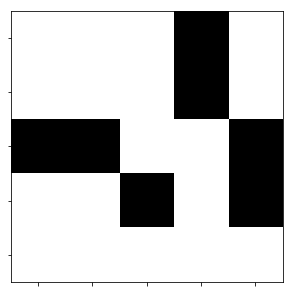

Paths are connected: True


In [21]:
import time
import random
random.seed(1)
from IPython.display import clear_output
%matplotlib inline
import matplotlib.pyplot as plt

def show_field(perc, i, last):
    field = perc.get_field()
    if not np.array_equal(last, field):
        fig, ax = plt.subplots(1, figsize=(5,5))
        ax.imshow(field, cmap=plt.cm.gray)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #plt.savefig(+str(i)+'.png', bbox_inches='tight', format='png')
        plt.show()
    return field

FIELD_X = 5
FIELD_Y = 5

perc = Percolation((FIELD_X, FIELD_Y))
last = perc.get_field()
for i in range(100):
    clear_output()
    x = random.randint(0,FIELD_X-1)
    y = random.randint(0,FIELD_Y-1)
    perc.free_site(x, y)
    last = show_field(perc, i, last)
    con = perc.has_path()
    print 'Paths are connected:', con
    if con:
        break
    time.sleep(1)

<h3 align="center">Percolation Example</h3>

The animation below illustrates the percolation of a 5x5 field of the code above.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/animation.gif" width="300" align="center"/>

# Questions

1. How many connected components result after performing the following sequence of union operations on a set of 10 items?<br>

`1-2 3-4 5-6 7-8 7-9 2-8 0-5 1-9`

&#9744; 1<br>
&#9744; 2<br>
&#9745; 3<br>
&#9744; 4<br>

**Solving**:
- {1,2}
- {1,2}{3,4}
- {1,2}{3,4}{5,6}
- {1,2}{3,4}{5,6}{7,8}
- {1,2}{3,4}{5,6}{7,8,9}
- {1,2,7,8,9}{3,4}{5,6}
- {1,2,7,8,9}{3,4}{0,5,6}
- {1,2,7,8,9}{3,4}{0,5,6}

2. What is the maximum number of `id[]` array entries that can change (from one value to a different value) during one call to union when using the quick-find data structure on nn elements?<br>

&#9744; 1<br>
&#9744; $\log_2 n \log$<br> 
&#9745; $n -1$<br>
&#9744; $n$

3. Suppose that in a quick-union data structure on 10 elements that the `id[]` array is<br>

| i     | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| ----- | - | - | - | - | - | - | - | - | - | - |
| id[i] | 0 | 9 | 6 | 5 | 4 | 2 | 6 | 1 | 0 | 5 |

Which are the roots of 3 and 7, respectively?

&#9744; 3 and 7<br>
&#9744; 4 and 4<br>
&#9744; 6 and 4<br>
&#9745; 6 and 6

**Answer**:<br>
3 $\rightarrow$ 5 $\rightarrow$ 2 $\rightarrow$ 6 $\rightarrow$ 6<br>
7 $\rightarrow$ 1 $\rightarrow$ 9 $\rightarrow$ 5 $\rightarrow$ 2 $\rightarrow$ 6 $\rightarrow$ 6 


4. What is the maximum number of array accesses during a `find` operation when using the quick-union data structure on $n$ elements?<br>

&#9744; constant<br>
&#9744; logarithmic<br>
&#9745; linear<br>
&#9744; quadratic

5. Suppose that the `id[]` array during the weighted quick-union (by size) algorithm is given as below. Which `id[]` entry changes when we apply the union operation to 3 and 6?<br>

<img src="images/question5.jpg" width="50%"/>

&#9744; `id[0]`<br>
&#9744; `id[3]`<br>
&#9744; `id[6]`<br>
&#9745; `id[8]`

6. When opening one new site in the percolation simulation, how many times is `union()` called?<br>

&#9745; 0, 1, 2, 3, or 4<br>
&#9744; 1, 2, 3, or 4<br>
&#9744; 2, 3, or 4<br>
&#9744; 4

# Interview Questions

1. **Social network connectivity**. Given a social network containing $n$ members and a log file containing $m$ timestamps at which times pairs of members formed friendships, design an algorithm to determine the earliest time at which all members are connected (*i.e.*, every member is a friend of a friend of a friend ... of a friend). Assume that the log file is sorted by timestamp and that friendship is an equivalence relation. The running time of your algorithm should be $m \log n$ or better and use extra space proportional to $n$.<br>

**Answer**: I think this could be developed by implementing the weighted quick-union find algorithm, where the timestamp is sorted in ascending order. First, we check the number of members in the log. Then, for each pair of members in the log, we perform `union()` and count how many members are connected. In case the number of connected members is equal to n-1, we stop adding new members and check the last timestamp.

Using the the algorithm for the list below, marked as `<member> <member> <timestamp>` as:

```
0 1 2019-03-20 00:00:00
0 2 2019-03-20 00:01:00
0 3 2019-03-20 00:02:00
2 4 2019-03-20 00:03:00
2 5 2019-03-20 00:04:00
3 6 2019-03-20 00:05:00
3 7 2019-03-20 00:06:00
6 8 2019-03-20 00:07:00
6 9 2019-03-20 00:08:00
3 5 2019-03-20 00:09:00
```

We have the algorithm:

```python
# Initiate our list with 10 members 
m = 10
WQUFind = WeightedQuickUnionFind(m)
for line in log:
    member1, member2, timestamp = line
    WQUFind.union(member1, member2)
    counter += 1
    if counter == m-1:
        break
print('Minimum timestamp with all members connected is {}'.format(timestamp))
``` 

Instead of using a counter, we can check in the internal structure of `WeightedQuickUnionFind` if all elements are connected to the same root.

---
2. **Union-find with specific canonical element**. Add a method `find()` to the union-find data type so that `find(i)` returns the largest element in the connected component containing $i$. The operations, `union()`, `connected()`, and `find()` should all take logarithmic time or better. For example, if one of the connected components is $\{1, 2, 6, 9\}$, then the `find()` method should return $9$ for each of the four elements in the connected components.

**Answer**: In this case, the union-find algorithm could have another list that stores the largest value when performing the `union()` operation. This largest value is related to the root of each tree. Thus, when computing the `find()` of a set, we have to only check the value associated with the root. 

Thus, our algorithm would be something like:

In [27]:
class WeightedQuickUnion_Find(object):
    def __init__(self, N): 
        # initialize union-find data structure with N objects (0 to N-1)
        self.id = [i for i in range(N)]
        self.sz = [1]*N
        self.large = [i for i in range(N)]
        
    def union(self, p, q):
        # add connection between p and q
        root_p = self.root(p)
        root_q = self.root(q)
        if root_p == root_q: 
            return
        
        large_p = self.large[root_p]
        large_q = self.large[root_q]
        if self.sz[root_p] < self.sz[root_q]:
            self.id[root_p] = root_q
            self.sz[root_q] += self.sz[root_p]
            if large_p > large_q:
                self.large[large_q] = large_p
        else:
            self.id[root_q] = root_p
            self.sz[root_p] += self.sz[root_q]
            if large_q > large_p:
                self.large[large_p] = large_q
                
    def connected(self, p, q):
        # are p and q in the same component?
        # return True or False
        if self.root(p) == self.root(q):
            return True
        return False
    
    def root(self, p):
        # get the root of the tree
        while p != self.id[p]:
            p = self.id[p]
        return p

    def find(self, p):
        # return the largest value
        root = self.root(p)
        return self.large[root]

In [33]:
wqfind = WeightedQuickUnion_Find(10)
print("Initial state:")
print("Add a new pairs: (4, 3)")
wqfind.union(4, 3)
print("Largest: %d" % wqfind.find(3))
print("Add a new pair: (3, 8)")
wqfind.union(3, 8)
print("Largest: %d" % wqfind.find(3))
print("Add a new pair: (6, 5)")
wqfind.union(6, 5)
print("Largest: %d" % wqfind.find(5))
print("Add a new pair: (9, 5)")
wqfind.union(9, 5)
print("Largest: %d" % wqfind.find(5))
print("Add a new pair: (7, 9)")
wqfind.union(7, 9)
print("Largest: %d" % wqfind.find(5))
print("Merge both sets adding: (5, 3)")
wqfind.union(5, 3)
print("Largest: %d" % wqfind.find(3))

Initial state:
Add a new pairs: (4, 3)
Largest: 4
Add a new pair: (3, 8)
Largest: 8
Add a new pair: (6, 5)
Largest: 6
Add a new pair: (9, 5)
Largest: 9
Add a new pair: (7, 9)
Largest: 9
Merge both sets adding: (5, 3)
Largest: 9


3. **Successor with delete**. Given a set of nn integers $S = \{ 0, 1, ... , n-1 \}$ and a sequence of requests of the following form:

- Remove $x$ from $S$<br>
- Find the successor of $x$: the smallest $y$ in $S$ such that $y \ge x$.<br>

design a data type so that all operations (except construction) take logarithmic time or better in the worst case.

**Answer**: In this question, we can use the previous algorithm that finds the largest value of our tree. In case of removing an element, we perform an `union()` of the element being removed and the next element. Our list containing the largest element keeps track of the next successor.